In [11]:
import VAE_code_function as vae
import CNN_code_function as cnn
import numpy as np

In [12]:
# Define the base directory where the dataset is located
base_dir = "ADD PATH TO DATASET"

# Define the model name
model_name = 'CVEA_Project_AI_version_x'

# Define the file path for saving the model architecture
model_filepath = model_name + '.json'
weights_filepath = model_name + '_weights.hdf5'

# Batch size for training
batch_size = 32

# Image size
img_size = 96

# The number of epochs for training
nr_epochs = 15

# Portion of training data used for VAE (0.0, 1.0]
split = 0.5

# latent dimensions for the VAE
latent_dim = 100

# Number of images generated per class
n = 1000

print('Model name is {}'.format(model_name))
print('Parameters-->\n Number of epochs: {}\n Batch size: {}\n Portion training data: {:.0%}\n Latend dim: {}'.format(nr_epochs, batch_size, split, latent_dim))

Model name is CVEA_Project_AI_version_51
Parameters-->
 Number of epochs: 15
 Batch size: 32
 Portion training data: 50%
 Latend dim: 100


Found 36000 images belonging to 1 classes.
Found 8000 images belonging to 1 classes.
Epoch 1/15
1125/1125 [==============================] - ETA: 0s - loss: 2788867.0000 - kl_loss: 1747038.5000 - reconstruction_loss: 1041.8323
Epoch 1: val_loss improved from inf to 923228.93750, saving model to CVEA_Project_AI_version_51_weights.hdf5


c:\Users\20213002\.conda\envs\8p361\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1125/1125 [==============================] - 5061s 4s/step - loss: 2788867.0000 - kl_loss: 1747038.5000 - reconstruction_loss: 1041.8323 - val_loss: 923228.9375 - val_kl_loss: 369.2309 - val_reconstruction_loss: 922.8593
Epoch 2/15
1125/1125 [==============================] - ETA: 0s - loss: 880699.4375 - kl_loss: 455.7245 - reconstruction_loss: 880.2440
Epoch 2: val_loss improved from 923228.93750 to 842791.62500, saving model to CVEA_Project_AI_version_51_weights.hdf5
1125/1125 [==============================] - 5367s 5s/step - loss: 880699.4375 - kl_loss: 455.7245 - reconstruction_loss: 880.2440 - val_loss: 842791.6250 - val_kl_loss: 464.0444 - val_reconstruction_loss: 842.3276
Epoch 3/15
1125/1125 [==============================] - ETA: 0s - loss: 828662.2500 - kl_loss: 470.7444 - reconstruction_loss: 828.1921
Epoch 3: val_loss improved from 842791.62500 to 820323.87500, saving model to CVEA_Project_AI_version_51_weights.hdf5
1125/1125 [==============================] - 5329s 5s/st

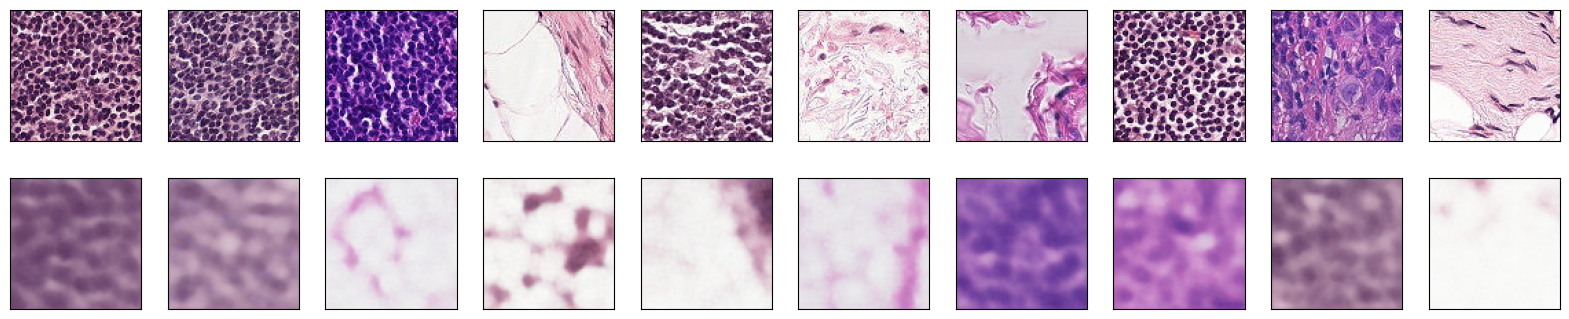

1/1 [==============================] - 0s 263ms/step


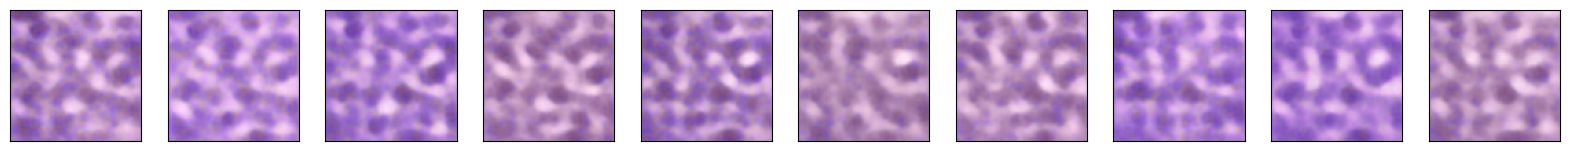

32/32 [==============================] - 11s 345ms/step
Images saved to: C:\Users\20213002\.vscode\Y3Q3 Project AI MIA/train_new_images_50/0/
Found 36000 images belonging to 1 classes.
Found 8000 images belonging to 1 classes.
Epoch 1/15
1125/1125 [==============================] - ETA: 0s - loss: 801422.3750 - kl_loss: 546.6487 - reconstruction_loss: 800.8754
Epoch 1: val_loss improved from inf to 704898.37500, saving model to CVEA_Project_AI_version_51_weights.hdf5
1125/1125 [==============================] - 3974s 4s/step - loss: 801422.3750 - kl_loss: 546.6487 - reconstruction_loss: 800.8754 - val_loss: 704898.3750 - val_kl_loss: 508.5211 - val_reconstruction_loss: 704.3901
Epoch 2/15
1125/1125 [==============================] - ETA: 0s - loss: 692189.5000 - kl_loss: 500.1691 - reconstruction_loss: 691.6897
Epoch 2: val_loss improved from 704898.37500 to 693830.50000, saving model to CVEA_Project_AI_version_51_weights.hdf5
1125/1125 [==============================] - 4067s 4s/step 

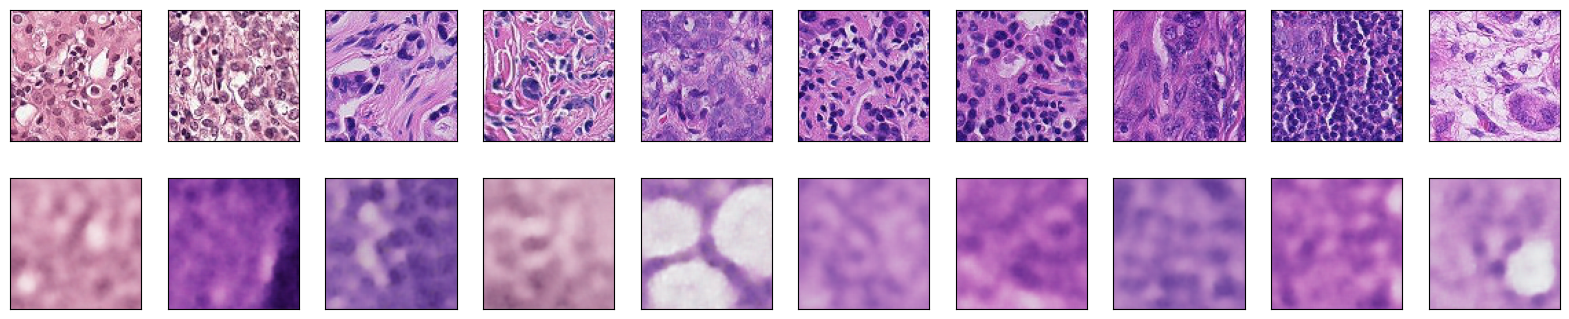

1/1 [==============================] - 0s 205ms/step


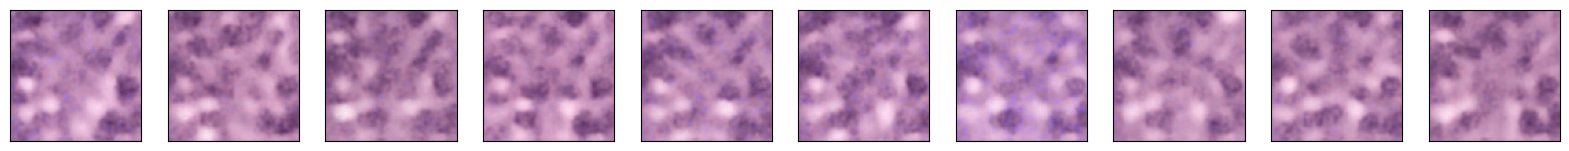

32/32 [==============================] - 8s 253ms/step
Images saved to: C:\Users\20213002\.vscode\Y3Q3 Project AI MIA/train_new_images_50/1/


In [13]:
# Perform autoencoder for specified classes (for both classes = [0,1])
classes = [0,1]
for i in classes:
    # Get data generators for the specified class
    train_gen, val_gen = vae.get_pcam_generators(base_dir, 
                                                 model_type='vae',
                                                 split=split, 
                                                 batch_size_gen=batch_size, 
                                                 class_type=i)
    
    # Construct VAE model and train it
    model_name = model_name+'_'+str(i)
    model, decoder = vae.construct_vae(train_gen, val_gen, weights_filepath, model_name, nr_epochs, latent_dim)
    
    # Reconstruct and display images
    vae.reconstruct_img(model, val_gen)

    # Generate new images, display and save them
    random_vector = np.random.random_sample(size=(10, latent_dim))
    vae.display_generated(decoder, random_vector)
    
    vae.generate_new_img(decoder, base_dir, latent_dim=latent_dim, split=split, class_type=i, num_samples=n)

In [14]:
def calculate_and_plot_ROC_AUC(base_dir, split, type='dense', model_name='my_model'):
    """
    Combine different functions to create and train the model, and to calculate and plot the ROC curve and AUC value.

    Args:
        base_dir (str): Path name with location of dataset.
        type (str): Type of model to use ('dense' or 'conv'). Default is 'dense'.
        model_name (str): Name of the model.

    """
    # Get the model
    if type == 'dense':
        model = cnn.get_model()
    elif type == 'conv':
        model = cnn.get_fcn_model()

    # Get the data generators
    train_gen, val_gen= vae.get_pcam_generators(base_dir, 
                                                model_type='cnn',
                                                split=split)
    
    model_filepath = model_name + '.json'
    weights_filepath = model_name + '_weights.hdf5'

    # Train the model
    cnn.train_model(model, train_gen, val_gen, weights_filepath, model_filepath, epochs=3)

    # Load the trained model weights
    model.load_weights(weights_filepath)

    # Evaluate the model
    score = model.evaluate(val_gen)
    print("Loss:", score[0])
    print("Accuracy:", score[1])
    
    # Calculate ROC and AUC
    fpr, tpr, roc_auc = cnn.calculate_roc_and_auc(model, val_gen)
    print("AUC:", roc_auc)
    
    # Plot ROC curve
    cnn.plot_roc_curve(fpr, tpr, roc_auc, type)

Found 2000 images belonging to 2 classes.
Found 16000 images belonging to 2 classes.
Epoch 1/3
62/62 [==============================] - ETA: 0s - loss: 0.3442 - auc_6: 0.9503 - accuracy: 0.8882
Epoch 1: val_loss improved from inf to 4.46609, saving model to CVEA_Project_AI_version_51_0_1_dense_weights.hdf5
62/62 [==============================] - 21s 335ms/step - loss: 0.3442 - auc_6: 0.9503 - accuracy: 0.8882 - val_loss: 4.4661 - val_auc_6: 0.5126 - val_accuracy: 0.5017
Epoch 2/3
 2/62 [..............................] - ETA: 3s - loss: 7.9508e-05 - auc_6: 1.0000 - accuracy: 1.0000

c:\Users\20213002\.conda\envs\8p361\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


62/62 [==============================] - ETA: 0s - loss: 2.1175 - auc_6: 0.9113 - accuracy: 0.7912
Epoch 2: val_loss improved from 4.46609 to 0.69260, saving model to CVEA_Project_AI_version_51_0_1_dense_weights.hdf5
62/62 [==============================] - 20s 329ms/step - loss: 2.1175 - auc_6: 0.9113 - accuracy: 0.7912 - val_loss: 0.6926 - val_auc_6: 0.5516 - val_accuracy: 0.5217
Epoch 3/3
62/62 [==============================] - ETA: 0s - loss: 0.4682 - auc_6: 0.8525 - accuracy: 0.7536
Epoch 3: val_loss did not improve from 0.69260
500/500 [==============================] - 17s 35ms/step - loss: 0.6926 - auc_6: 0.5516 - accuracy: 0.5217
Loss: 0.6926048398017883
Accuracy: 0.5515591502189636
500/500 [==============================] - 17s 35ms/step
Classification report:
               precision    recall  f1-score   support

           0       0.56      0.20      0.29      8000
           1       0.51      0.85      0.64      8000

    accuracy                           0.52     16000

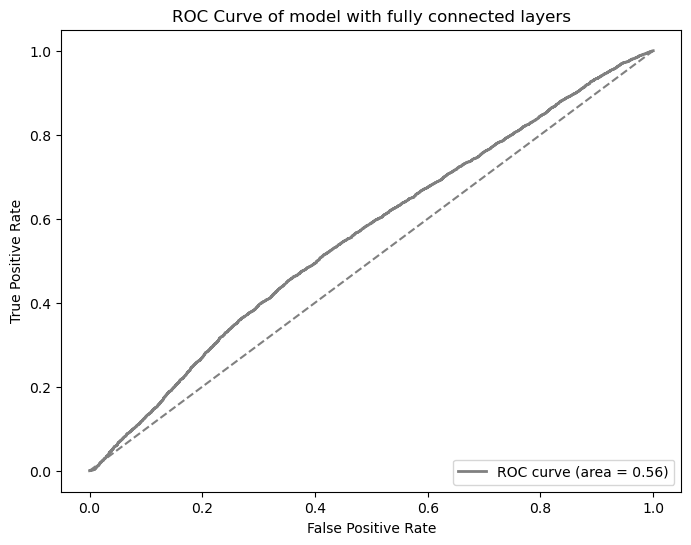

In [19]:
calculate_and_plot_ROC_AUC(base_dir, type='dense', split=split, model_name=model_name+'_dense')